## Logistic Regression

### Question 2 
 1. Use the code given in listing 1 to load data

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Make a copy to avoid the warning
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded


# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


2. Now, use the code given in listing 2 to train a logistic regression model. Here, did you
 encounter any errors? If yes, what were they, and how would you go about resolving
 them ?

### Corrected One

In [9]:
# Clean column names
df_filtered.columns = df_filtered.columns.str.strip()

# Features and target
y = df_filtered['class_encoded']
X = df_filtered.drop(['class_encoded', 'species'], axis=1)

# Convert categorical features to numeric
X = pd.get_dummies(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train logistic regression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 1.0
Coefficients: [[ 1.47470138 -1.37433927 -0.14078439 -0.00345268 -0.22720311  0.7093501
  -0.55844447  0.12816763 -0.20446511]]
Intercept: [-0.07629748]


 2. Compare the performance of the "liblinear" and "saga" solvers with feature scaling.
 If there is a significant difference in the accuracy with and without feature scaling,
 what is the reason for that.
 You may use Standard Scaler available in sklearn library

In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np


# Prepare data (assuming categorical features are already encoded)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Without scaling
logreg_saga_no_scale = LogisticRegression(solver='saga', max_iter=5000)
logreg_liblinear_no_scale = LogisticRegression(solver='liblinear')

logreg_saga_no_scale.fit(X_train, y_train)
logreg_liblinear_no_scale.fit(X_train, y_train)

accuracy_saga_no_scale = accuracy_score(y_test, logreg_saga_no_scale.predict(X_test))
accuracy_liblinear_no_scale = accuracy_score(y_test, logreg_liblinear_no_scale.predict(X_test))

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_saga_scaled = LogisticRegression(solver='saga', max_iter=5000)
logreg_liblinear_scaled = LogisticRegression(solver='liblinear')

logreg_saga_scaled.fit(X_train_scaled, y_train)
logreg_liblinear_scaled.fit(X_train_scaled, y_train)

accuracy_saga_scaled = accuracy_score(y_test, logreg_saga_scaled.predict(X_test_scaled))
accuracy_liblinear_scaled = accuracy_score(y_test, logreg_liblinear_scaled.predict(X_test_scaled))

# Results comparison
print("Without Scaling:")
print(f"SAGA Accuracy: {accuracy_saga_no_scale:.4f}")
print(f"LibLinear Accuracy: {accuracy_liblinear_no_scale:.4f}")

print("\nWith Scaling:")
print(f"SAGA Accuracy: {accuracy_saga_scaled:.4f}")
print(f"LibLinear Accuracy: {accuracy_liblinear_scaled:.4f}")

print("\nImprovement with Scaling:")
print(f"SAGA Improvement: {accuracy_saga_scaled - accuracy_saga_no_scale:.4f}")
print(f"LibLinear Improvement: {accuracy_liblinear_scaled - accuracy_liblinear_no_scale:.4f}")


Without Scaling:
SAGA Accuracy: 0.7209
LibLinear Accuracy: 1.0000

With Scaling:
SAGA Accuracy: 1.0000
LibLinear Accuracy: 1.0000

Improvement with Scaling:
SAGA Improvement: 0.2791
LibLinear Improvement: 0.0000


c:\Users\META\anaconda3\envs\tf\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


8. Suppose you have a categorical feature with the categories ’red’, ’blue’, ’green’, ’blue’,
 ’green’. After encoding this feature using label encoding, you then apply a feature
 scaling method such as Standard Scaling or Min-Max Scaling. Is this approach
 correct? or not?. What do you propose ?

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example data
data = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'blue', 'green'],
    'numerical_feature': [10, 20, 30, 40, 50]
})

# Use One-Hot Encoding instead
data_encoded = pd.get_dummies(data, columns=['color'], drop_first=True)

# Scale only numerical features
scaler = StandardScaler()
numerical_cols = ['numerical_feature']
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

print(data_encoded)

   numerical_feature  color_green  color_red
0          -1.414214        False       True
1          -0.707107        False      False
2           0.000000         True      False
3           0.707107        False      False
4           1.414214         True      False


### Question 3

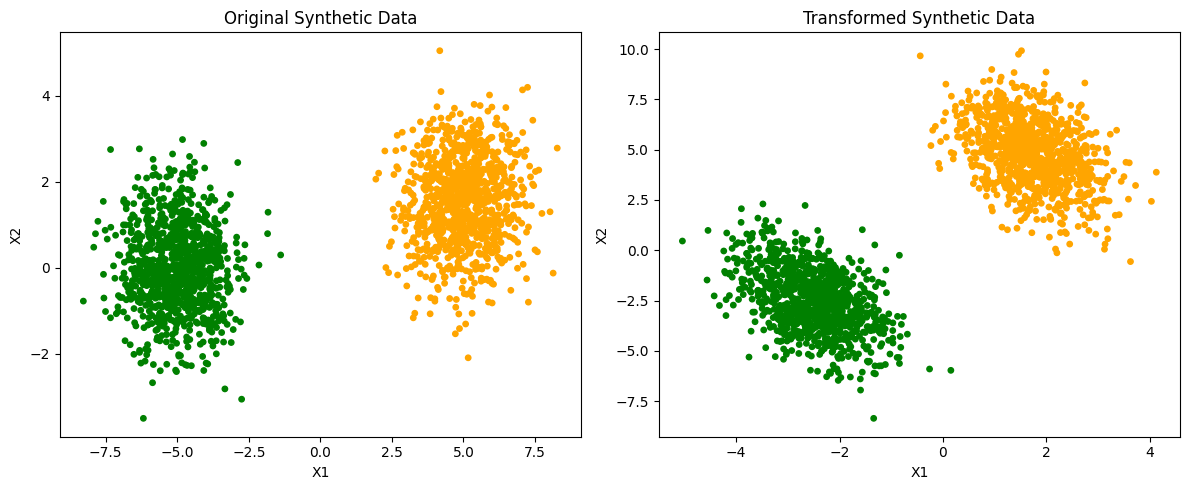

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Save original data for comparison
X_original = X.copy()

# Apply linear transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X_transformed = np.dot(X, transformation)

# Define custom colors for the two classes
colors = np.array(['green', 'orange'])

# Plot original and transformed datasets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data
axes[0].scatter(X_original[:, 0], X_original[:, 1], c=colors[y], s=15)
axes[0].set_title("Original Synthetic Data")
axes[0].set_xlabel("X1")
axes[0].set_ylabel("X2")

# Transformed data
axes[1].scatter(X_transformed[:, 0], X_transformed[:, 1], c=colors[y], s=15)
axes[1].set_title("Transformed Synthetic Data")
axes[1].set_xlabel("X1")
axes[1].set_ylabel("X2")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def sigmoid_fn(z):
    """Sigmoid activation function"""
    return 1 / (1 + np.exp(-z))

def loss_function(X_data, y_data, theta):
    """Compute logistic regression loss (cross-entropy)"""
    n_samples = X_data.shape[0]
    predictions = sigmoid_fn(X_data @ theta)
    predictions = np.clip(predictions, 1e-15, 1 - 1e-15)  # numerical stability
    cost_val = -(1/n_samples) * (y_data @ np.log(predictions) +
                                 (1 - y_data) @ np.log(1 - predictions))
    return cost_val

def gradient_fn(X_data, y_data, theta):
    """Compute gradient of loss"""
    n_samples = X_data.shape[0]
    predictions = sigmoid_fn(X_data @ theta)
    return (1/n_samples) * (X_data.T @ (predictions - y_data))

def batch_gd(X_data, y_data, lr=0.01, n_iter=20):
    """Batch Gradient Descent with tracking of loss and parameters"""
    # Add bias term (column of ones)
    X_aug = np.c_[np.ones(X_data.shape[0]), X_data]

    # Initialize parameters with small random values
    np.random.seed(7)
    theta = np.random.randn(X_aug.shape[1]) * 0.01

    # Track loss and parameter updates
    loss_values = []
    theta_updates = []

    for epoch in range(n_iter):
        cost = loss_function(X_aug, y_data, theta)
        grad = gradient_fn(X_aug, y_data, theta)

        # Parameter update
        theta -= lr * grad

        # Save history
        loss_values.append(cost)
        theta_updates.append(theta.copy())

        print(f"Epoch {epoch+1}: Loss = {cost:.5f}")

    return theta, loss_values, theta_updates

# --- Run Batch Gradient Descent ---
theta_final, loss_hist, theta_hist = batch_gd(X, y)
print("\nFinal parameters:", theta_final)
print("Final loss:", loss_hist[-1])


Epoch 1: Loss = 0.70477
Epoch 2: Loss = 0.64157
Epoch 3: Loss = 0.58648
Epoch 4: Loss = 0.53840
Epoch 5: Loss = 0.49632
Epoch 6: Loss = 0.45938
Epoch 7: Loss = 0.42685
Epoch 8: Loss = 0.39807
Epoch 9: Loss = 0.37251
Epoch 10: Loss = 0.34972
Epoch 11: Loss = 0.32931
Epoch 12: Loss = 0.31096
Epoch 13: Loss = 0.29440
Epoch 14: Loss = 0.27940
Epoch 15: Loss = 0.26577
Epoch 16: Loss = 0.25332
Epoch 17: Loss = 0.24194
Epoch 18: Loss = 0.23148
Epoch 19: Loss = 0.22186
Epoch 20: Loss = 0.21297

Final parameters: [0.01552118 0.29759144 0.04523434]
Final loss: 0.21297399372154383


In [16]:
import numpy as np

def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    """Compute logistic regression cost (cross-entropy)"""
    m = X.shape[0]
    h = sigmoid(X @ weights)
    h = np.clip(h, 1e-15, 1-1e-15)  # avoid log(0)
    cost = -(1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return cost

def compute_gradient(X, y, weights):
    """Compute gradient"""
    m = X.shape[0]
    h = sigmoid(X @ weights)
    return (1/m) * (X.T @ (h - y))

def compute_hessian(X, weights):
    """Compute Hessian matrix (vectorized, simpler)"""
    h = sigmoid(X @ weights)
    S = h * (1 - h)  # vector of size m
    H = X.T @ (X * S[:, np.newaxis])
    return H / X.shape[0]

def newtons_method(X, y, iterations=20):
    """Newton's method for logistic regression"""
    # Add intercept term
    X_aug = np.column_stack([np.ones(X.shape[0]), X])
    weights = np.random.randn(X_aug.shape[1]) * 0.01  # small random init

    cost_history = []
    weight_history = []

    print("Newton's Method")
    print("Iteration | Cost")
    print("-" * 20)

    for i in range(iterations):
        grad = compute_gradient(X_aug, y, weights)
        H = compute_hessian(X_aug, weights) + 1e-6 * np.eye(X_aug.shape[1])  # regularization for stability
        weights -= np.linalg.solve(H, grad)  # Newton's update
        
        cost = compute_cost(X_aug, y, weights)
        cost_history.append(cost)
        weight_history.append(weights.copy())
        
        print(f"{i+1:9d} | {cost:.6f}")

    return weights, cost_history, weight_history

# Run Newton's Method using previous X and y variables
final_weights, cost_history, weight_history = newtons_method(X, y, iterations=20)
print(f"Final weights: {final_weights}")
print(f"Final cost: {cost_history[-1]:.6f}")

Newton's Method
Iteration | Cost
--------------------
        1 | 0.145105
        2 | 0.052720
        3 | 0.020296
        4 | 0.007999
        5 | 0.003201
        6 | 0.001300
        7 | 0.000536
        8 | 0.000224
        9 | 0.000095
       10 | 0.000040
       11 | 0.000017
       12 | 0.000007
       13 | 0.000003
       14 | 0.000001
       15 | 0.000001
       16 | 0.000000
       17 | 0.000000
       18 | 0.000000
       19 | 0.000000
       20 | 0.000000
Final weights: [-1.43489525  5.83858654  0.57112341]
Final cost: 0.000000


Epoch 1: Loss = 0.70477
Epoch 2: Loss = 0.64157
Epoch 3: Loss = 0.58648
Epoch 4: Loss = 0.53840
Epoch 5: Loss = 0.49632
Epoch 6: Loss = 0.45938
Epoch 7: Loss = 0.42685
Epoch 8: Loss = 0.39807
Epoch 9: Loss = 0.37251
Epoch 10: Loss = 0.34972
Epoch 11: Loss = 0.32931
Epoch 12: Loss = 0.31096
Epoch 13: Loss = 0.29440
Epoch 14: Loss = 0.27940
Epoch 15: Loss = 0.26577
Epoch 16: Loss = 0.25332
Epoch 17: Loss = 0.24194
Epoch 18: Loss = 0.23148
Epoch 19: Loss = 0.22186
Epoch 20: Loss = 0.21297

Batch Gradient Descent Final weights: [0.01552118 0.29759144 0.04523434]
Batch Gradient Descent Final cost: 0.212974
Newton's Method
Iteration | Cost
--------------------
        1 | 0.145105
        2 | 0.052720
        3 | 0.020296
        4 | 0.007999
        5 | 0.003201
        6 | 0.001300
        7 | 0.000536
        8 | 0.000224
        9 | 0.000095
       10 | 0.000040
       11 | 0.000017
       12 | 0.000007
       13 | 0.000003
       14 | 0.000001
       15 | 0.000001
       16 | 0.000000
 

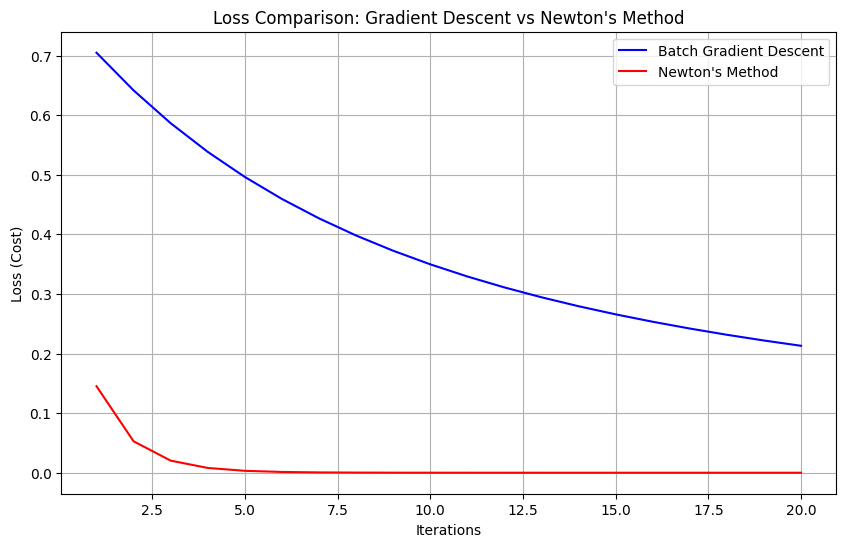

In [19]:
# Run Batch Gradient Descent
theta_gd, loss_gd, theta_hist_gd = batch_gd(X, y, lr=0.01, n_iter=20)
print(f"\nBatch Gradient Descent Final weights: {theta_gd}")
print(f"Batch Gradient Descent Final cost: {loss_gd[-1]:.6f}")

# Run Newton's Method
theta_newton, loss_newton, theta_hist_newton = newtons_method(X, y, iterations=20)
print(f"\nNewton's Method Final weights: {theta_newton}")
print(f"Newton's Method Final cost: {loss_newton[-1]:.6f}")

# Plot Loss Comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1, len(loss_gd)+1), loss_gd, label="Batch Gradient Descent", color='blue')
plt.plot(range(1, len(loss_newton)+1), loss_newton, label="Newton's Method", color='red')
plt.xlabel('Iterations')
plt.ylabel('Loss (Cost)')
plt.title('Loss Comparison: Gradient Descent vs Newton\'s Method')
plt.legend()
plt.grid(True)
plt.show()